# Exercise: DC Housing Properties

Use the D.C. Residential Properties dataset (https://www.kaggle.com/christophercorrea/dc-residential-properties) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

Upload your notebook to your Github repository and submit the URL for this assignment.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "DC_Properties.csv"

dcp_df = pd.read_csv(filepath)
dcp_df.head()

/Users/shaylatheroo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
dcp_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

If we do a dropna() on the dataframe, we end up with nothing, so we will need to fill these in with values that make sense for what the column represents.

In [6]:
dcp_na = dcp_df.dropna()

In [7]:
dcp_na.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [9]:
dcp_df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

To be really honest, the assignment wants us to do z-score standardization and Min-max scaling just on the price. We can, really, drop all columns from consideration other than the price and drop the nulls. There are 60741 null values and 98216 with values. I'd feel generating that many values would make any resulting analysis have way less integrity. If our analysis is to be on price, then only properties with a listed price are valid.

In [10]:
price_df = dcp_df['PRICE']

In [11]:
price_df.head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [12]:
price_df = price_df.dropna()

In [13]:
price_df.count()

98216

In [19]:
price_df.head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

Perfect, exactly what we were aiming for. The price_df dataframe is down to only the data we want for analysis.

# Z-score

I'll be using method 1 from our class example to calculate the z-scores. I think it's a bit tidier and better spells out exactly what we're doing.

In [16]:
#mean for the column
mean = price_df.mean()

#standard deviation of the column
std = price_df.std()

#each value in column minus the mean and then divide by the standard deviation
price_z = (price_df - mean)/std

price_z.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

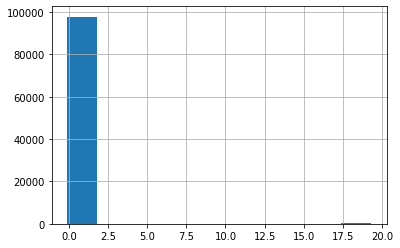

In [45]:
price_z.hist()

# Mix-Max Scaling

In [20]:
minmax_sc = MinMaxScaler()

In [36]:
price_shape = price_df.to_frame()

In [37]:
price_minmax = minmax_sc.fit_transform(price_shape)

In [38]:
price_minmax.mean(), price_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [42]:
pri_mm_col = pd.Series(price_minmax.reshape(-1))
pri_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [43]:
pri_mm_col.min(), pri_mm_col.max()

(0.0, 0.9999999999999999)

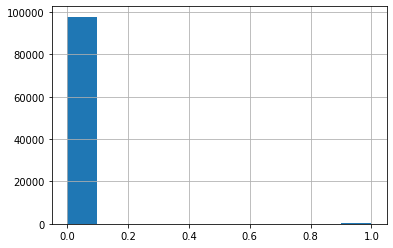

In [44]:
pri_mm_col.hist()